In [178]:
import numpy as np
from itertools import cycle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [179]:
class Perceptron:
    def __init__(self, train_data, target, lr=0.01, input_nodes=2):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.input_nodes = input_nodes
        self.w = np.random.uniform(size=self.input_nodes)
        self.b = -1
        self.node_val = np.zeros(self.input_nodes)
    def _gradient(self, node, exp, output):
        return node * (exp - output)
    def update_weights(self, exp, output):
        for i in range(self.input_nodes):
            self.w[i] += self.lr * self._gradient(self.node_val[i], exp, output)
        self.b += self.lr * self._gradient(1, exp, output)
    def forward(self, datapoint):
        return self.b + np.dot(self.w, datapoint)
    def classify(self, datapoint):
        if self.forward(datapoint) >= 0:
            return 1
        return 0    
    def plot(self, h=0.01):
        plt.figure(figsize=(8, 8))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)
        colors = { 0: "ro", 1: "go"}
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]], [self.train_data[i][1]], colors[self.target[i][0]], markersize=20)
        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)
    def train(self):
        correct_counter = 0
        for train, target in cycle(zip(self.train_data, self.target)):
            if correct_counter == len(self.train_data):
                break
            output = self.classify(train)
            self.node_val = train
            if output == target:
                correct_counter += 1
            else:
                self.update_weights(target, output)
                correct_counter = 0

In [180]:
# Data Set
train_data = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
target_or = np.array([[0],[1],[1],[1]])
target_and = np.array([[0],[0],[0],[1]])

In [181]:
X1 = np.array([x[0] for x in train_data])
X2 = np.array([x[1] for x in train_data])
and_target = np.array([x[0] for x in target_and])
or_target = np.array([x[0] for x in target_or])


		--AND GATE-- 

Initial weights :  [0.44994962 0.0891543 ]
Initial bias :  -1

Final weights :  [0.60994962 0.2491543 ]
Final bias :  [-0.84]

Error : 	 0.0


,X1,X2,Target output,Predducted CAT-2
0,0,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,1,1,1


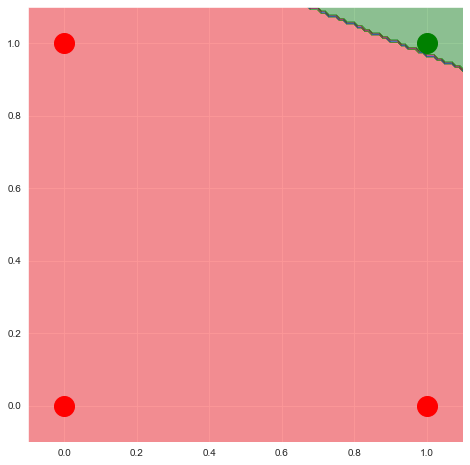

In [182]:
p_and = Perceptron(train_data, target_and)
print("\t\t--AND GATE-- \n")
print("Initial weights : ", p_and.w)
print("Initial bias : ", p_and.b)

p_and.train()

print("\nFinal weights : ", p_and.w)
print("Final bias : ", p_and.b)

and_predict = np.array([p_and.classify([x[0], x[1]]) for x in train_data])

df = pd.DataFrame({'X1': X1, 'X2': X2, 'Target output':and_target, 'Predducted CAT-2': and_predict})

print("\nError : \t", (1-accuracy_score(and_target, and_predict))*100)

p_and.plot()

df

		--OR GATE-- 

Initial weights :  [0.14561965 0.48546912]
Initial bias :  -1

Final weights :  [0.50561965 0.67546912]
Final bias :  [-0.5]

Error : 	 0.0


,X1,X2,Target output,Predducted CAT-2
0,0,0,0,0
1,0,1,1,1
2,1,0,1,1
3,1,1,1,1


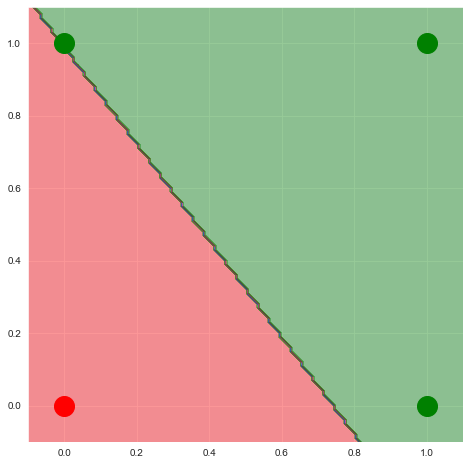

In [183]:
p_or = Perceptron(train_data, target_or)
print("\t\t--OR GATE-- \n")
print("Initial weights : ", p_or.w)
print("Initial bias : ", p_or.b)

p_or.train()

print("\nFinal weights : ", p_or.w)
print("Final bias : ", p_or.b)

or_predict = np.array([p_or.classify([x[0], x[1]]) for x in train_data])

df = pd.DataFrame({'X1': X1, 'X2': X2, 'Target output':or_target, 'Predducted CAT-2': or_predict})

print("\nError : \t", (1-accuracy_score(or_target, or_predict))*100)

p_or.plot()

df